# 1 - Importando módulos necessários

In [46]:
!pip install quantstats

In [47]:
import pandas as pd
import quantstats as qs

# 2 - Baixar os dados disponibilizados

In [48]:
dados_empresas = pd.read_csv('dados_empresas.csv')
dados_empresas

,data,ticker,preco_fechamento_ajustado,volume_negociado,dy
0,2019-04-30,AALR3,14.87,2569789.0,0.005640
1,2019-05-31,AALR3,13.90,1586619.0,0.006030
2,2019-06-30,AALR3,14.30,10832812.0,0.005863
3,2019-07-31,AALR3,14.67,2810704.0,0.005716
4,2019-08-31,AALR3,18.99,4488459.0,0.004415
...,...,...,...,...,...
47302,2023-07-31,ZAMP3,4.42,4634150.0,0.000000
47303,2023-08-31,ZAMP3,5.55,14211395.0,0.000000
47304,2023-09-30,ZAMP3,6.13,8921464.0,0.000000
47305,2023-10-31,ZAMP3,6.35,6714596.0,0.000000


# 3 - Calcular o retorno mensal das empresas

In [49]:
dados_empresas['retorno'] = dados_empresas.groupby('ticker')['preco_fechamento_ajustado'].pct_change()

dados_empresas

,data,ticker,preco_fechamento_ajustado,volume_negociado,dy,retorno
0,2019-04-30,AALR3,14.87,2569789.0,0.005640,NaN
1,2019-05-31,AALR3,13.90,1586619.0,0.006030,-0.065232
2,2019-06-30,AALR3,14.30,10832812.0,0.005863,0.028777
3,2019-07-31,AALR3,14.67,2810704.0,0.005716,0.025874
4,2019-08-31,AALR3,18.99,4488459.0,0.004415,0.294479
...,...,...,...,...,...,...
47302,2023-07-31,ZAMP3,4.42,4634150.0,0.000000,-0.028571
47303,2023-08-31,ZAMP3,5.55,14211395.0,0.000000,0.255656
47304,2023-09-30,ZAMP3,6.13,8921464.0,0.000000,0.104505
47305,2023-10-31,ZAMP3,6.35,6714596.0,0.000000,0.035889


In [50]:
dados_empresas['retorno'] = dados_empresas.groupby('ticker')['retorno'].shift(-1)

dados_empresas

,data,ticker,preco_fechamento_ajustado,volume_negociado,dy,retorno
0,2019-04-30,AALR3,14.87,2569789.0,0.005640,-0.065232
1,2019-05-31,AALR3,13.90,1586619.0,0.006030,0.028777
2,2019-06-30,AALR3,14.30,10832812.0,0.005863,0.025874
3,2019-07-31,AALR3,14.67,2810704.0,0.005716,0.294479
4,2019-08-31,AALR3,18.99,4488459.0,0.004415,0.005266
...,...,...,...,...,...,...
47302,2023-07-31,ZAMP3,4.42,4634150.0,0.000000,0.255656
47303,2023-08-31,ZAMP3,5.55,14211395.0,0.000000,0.104505
47304,2023-09-30,ZAMP3,6.13,8921464.0,0.000000,0.035889
47305,2023-10-31,ZAMP3,6.35,6714596.0,0.000000,-0.083465


# 4 - Filtrar liquidez

In [51]:
dados_empresas = dados_empresas[dados_empresas['volume_negociado'] > 1000000]

dados_empresas

,data,ticker,preco_fechamento_ajustado,volume_negociado,dy,retorno
0,2019-04-30,AALR3,14.87,2569789.0,0.005640,-0.065232
1,2019-05-31,AALR3,13.90,1586619.0,0.006030,0.028777
2,2019-06-30,AALR3,14.30,10832812.0,0.005863,0.025874
3,2019-07-31,AALR3,14.67,2810704.0,0.005716,0.294479
4,2019-08-31,AALR3,18.99,4488459.0,0.004415,0.005266
...,...,...,...,...,...,...
47302,2023-07-31,ZAMP3,4.42,4634150.0,0.000000,0.255656
47303,2023-08-31,ZAMP3,5.55,14211395.0,0.000000,0.104505
47304,2023-09-30,ZAMP3,6.13,8921464.0,0.000000,0.035889
47305,2023-10-31,ZAMP3,6.35,6714596.0,0.000000,-0.083465


# 5 - Ranking do indicador (DY)

In [52]:
dados_empresas['ranking_dy'] = dados_empresas.groupby('data')['dy'].rank(ascending = False)

dados_empresas

C:\Users\home\AppData\Local\Temp\ipykernel_6920\253690589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_empresas['ranking_dy'] = dados_empresas.groupby('data')['dy'].rank(ascending = False)


,data,ticker,preco_fechamento_ajustado,volume_negociado,dy,retorno,ranking_dy
0,2019-04-30,AALR3,14.87,2569789.0,0.005640,-0.065232,111.0
1,2019-05-31,AALR3,13.90,1586619.0,0.006030,0.028777,115.0
2,2019-06-30,AALR3,14.30,10832812.0,0.005863,0.025874,115.0
3,2019-07-31,AALR3,14.67,2810704.0,0.005716,0.294479,114.0
4,2019-08-31,AALR3,18.99,4488459.0,0.004415,0.005266,118.0
...,...,...,...,...,...,...,...
47302,2023-07-31,ZAMP3,4.42,4634150.0,0.000000,0.255656,192.5
47303,2023-08-31,ZAMP3,5.55,14211395.0,0.000000,0.104505,189.5
47304,2023-09-30,ZAMP3,6.13,8921464.0,0.000000,0.035889,185.0
47305,2023-10-31,ZAMP3,6.35,6714596.0,0.000000,-0.083465,185.0


In [53]:
dados_empresas[dados_empresas['data'] == '2017-03-31'].sort_values('ranking_dy').head(20)


,data,ticker,preco_fechamento_ajustado,volume_negociado,dy,retorno,ranking_dy
43473,2017-03-31,TIET4,2.07,1925690.0,0.158998,0.000000,1.0
43354,2017-03-31,TIET11,10.45,15211154.0,0.157838,-0.008612,2.0
42193,2017-03-31,TAEE11,11.59,28726476.0,0.117823,0.002588,3.0
12130,2017-03-31,CGAS5,23.56,1950843.0,0.102472,0.028014,4.0
30843,2017-03-31,MPLU3,31.41,27986629.0,0.088080,0.085642,5.0
19775,2017-03-31,ENBR3,10.11,20250365.0,0.082480,-0.037587,6.0
36375,2017-03-31,QUAL3,14.11,59107565.0,0.081989,0.094259,7.0
8198,2017-03-31,BRKM5,24.48,40750468.0,0.079177,0.075572,8.0
21879,2017-03-31,FESA4,1.80,1653483.0,0.074967,0.016667,9.0
22272,2017-03-31,FLRY3,16.06,28976540.0,0.068584,0.240971,10.0


# 6 - Criar as carteiras

In [54]:
dados_empresas = dados_empresas[dados_empresas['ranking_dy'] <= 10]

dados_empresas[dados_empresas['data'] == '2017-04-30'].sort_values('ranking_dy').head(20)


,data,ticker,preco_fechamento_ajustado,volume_negociado,dy,retorno,ranking_dy
21542,2017-04-30,EZTC3,12.67,10403362.0,0.102459,-0.074980,1.0
12131,2017-04-30,CGAS5,24.22,3151387.0,0.099654,-0.014038,2.0
36376,2017-04-30,QUAL3,15.44,33808772.0,0.096704,0.267487,3.0
30844,2017-04-30,MPLU3,34.10,14568229.0,0.081138,0.041935,4.0
19175,2017-04-30,ELET6,16.73,154787371.0,0.078265,-0.191871,5.0
42194,2017-04-30,TAEE11,11.62,29898375.0,0.076812,0.030981,6.0
43355,2017-04-30,TIET11,10.36,19958932.0,0.076618,0.049228,7.0
13756,2017-04-30,CPLE3,1.37,1032175.0,0.075574,0.021898,8.0
21880,2017-04-30,FESA4,1.83,1211271.0,0.073856,0.060109,9.0
43974,2017-04-30,TPIS3,13.10,3297428.0,0.069666,-0.245038,10.0


# 7 - Calcular a rentabilidade por carteira

In [55]:
rentabilidade_por_carteira = dados_empresas.groupby('data')['retorno'].mean()

rentabilidade_por_carteira = rentabilidade_por_carteira.to_frame()
rentabilidade_por_carteira

,retorno
data,
2012-12-31,-0.007706
2013-01-31,-0.029301
2013-02-28,-0.036835
2013-03-31,-0.073550
2013-04-30,-0.000735
...,...
2023-07-31,-0.038636
2023-08-31,0.108332
2023-09-30,-0.128664


# 8 - Calcular a rentabilidade do modelo

In [56]:
rentabilidade_por_carteira['estrategia_dy'] = (rentabilidade_por_carteira['retorno'] + 1).cumprod() - 1

rentabilidade_por_carteira = rentabilidade_por_carteira.shift(1)

rentabilidade_por_carteira = rentabilidade_por_carteira.dropna()

rentabilidade_por_carteira

,retorno,estrategia_dy
data,,
2013-01-31,-0.007706,-0.007706
2013-02-28,-0.029301,-0.036781
2013-03-31,-0.036835,-0.072262
2013-04-30,-0.073550,-0.140497
2013-05-31,-0.000735,-0.141128
...,...,...
2023-07-31,0.054601,5.285302
2023-08-31,-0.038636,5.042464
2023-09-30,0.108332,5.697054


## Passo 9: Calcula a rentabilidade do ibovespa no mesmo período.

In [57]:
ibov = pd.read_csv('ibov.csv')

retornos_ibov = ibov['fechamento'].pct_change().dropna()
retorno_acum_ibov = (1 + retornos_ibov).cumprod() - 1
rentabilidade_por_carteira['Ibovespa'] = retorno_acum_ibov.values
rentabilidade_por_carteira = rentabilidade_por_carteira.drop('retorno', axis = 1)


## 10 - Resultados

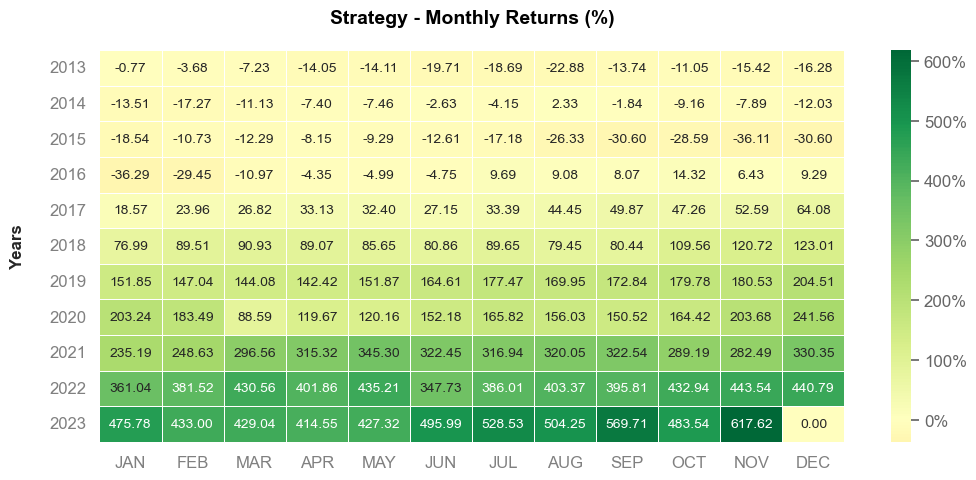

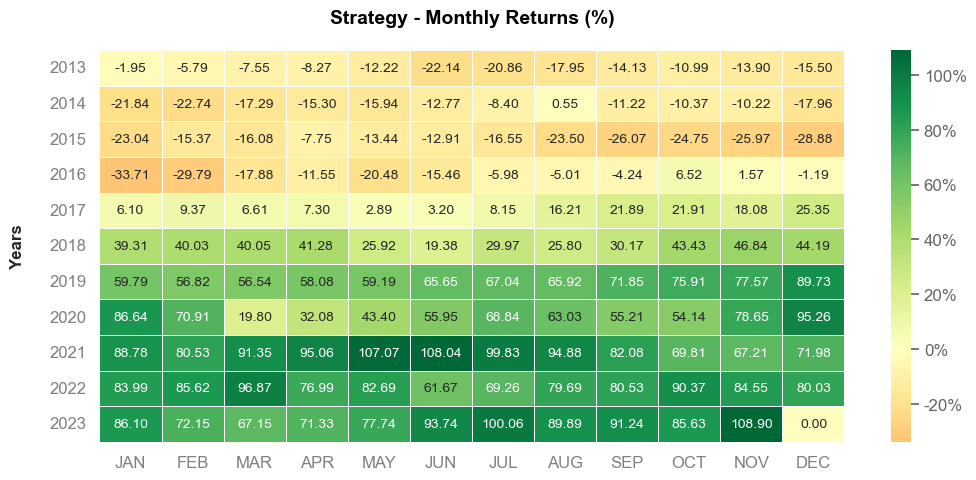

In [58]:
qs.extend_pandas()
rentabilidade_por_carteira.index = pd.to_datetime(rentabilidade_por_carteira.index)

rentabilidade_por_carteira['estrategia_dy'].plot_monthly_heatmap()
rentabilidade_por_carteira['Ibovespa'].plot_monthly_heatmap()

<Axes: xlabel='data'>

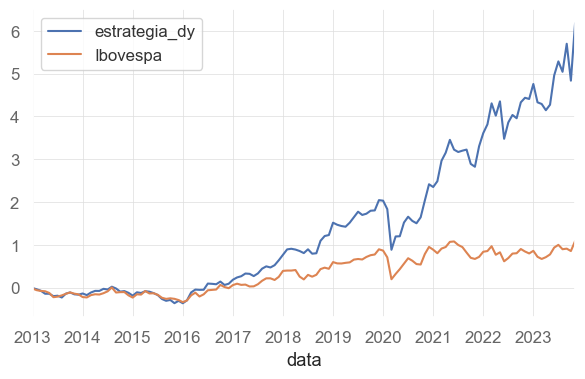

In [59]:
rentabilidade_por_carteira.plot(figsize = (7,4))

## 11 - Comprar a última carteira gerada pelo modelo
https://www.mql5.com/en/docs/python_metatrader5

In [60]:
ultima_carteira = dados_empresas[dados_empresas['data'] == '2023-11-30']

tickers = ultima_carteira['ticker'].to_list()

tickers

['AGRO3',
 'BRAP3',
 'BRAP4',
 'CSNA3',
 'GOAU4',
 'GRND3',
 'LEVE3',
 'MTRE3',
 'PETR3',
 'PETR4']

In [61]:
import MetaTrader5 as mt5

ModuleNotFoundError: No module named 'MetaTrader5'

In [ ]:
mt5.initialize()
for ticker in tickers:

    print(ticker)
    
    mt5.symbol_select(ticker)
    preco = mt5.symbol_info_tick(ticker).ask
    quantidade = 100.0
    ordem_compra = {
        "action": mt5.TRADE_ACTION_DEAL,
        "symbol": ticker,
        "volume": quantidade,
        "type": mt5.ORDER_TYPE_BUY,
        "price": preco,
        "magic": 1,
        "comment": "Trades automáticos",
        "type_time": mt5.ORDER_TIME_DAY,
        "type_filling": mt5.ORDER_FILLING_RETURN,
    }
    result_compra = mt5.order_send(ordem_compra)